In [1]:
# Refer: https://docs.python.org/3/library/importlib.html#importing-a-source-file-directly
# Refer: https://stackoverflow.com/questions/4383571/importing-files-from-different-folder

import pandas as pd
import numpy as np
import sys
import os
import traceback
from IPython.display import display
from module_import import module_from_file

In [2]:
util_eda = module_from_file("eda", "../utils/eda.py")
eda=util_eda.eda()

util_ba = module_from_file("bivariate_analysis", "../utils/bivariate_analysis.py")
bivariate_analysis=util_ba.bivariate_analysis()

util_un = module_from_file("univariate_analysis", "../utils/univariate_analysis.py")
univariate_analysis=util_un.univariate_analysis()

util_model = module_from_file("modals", "../utils/modals.py")
modals=util_model.modals()

In [3]:
sheet_name="Holiday_Package.csv"
target_variable='Holliday_Package'
modals_data=eda.read_file('model_data.xlsx')

In [4]:
os.getcwd()

'c:\\Users\\KRITIKA AGARWAL\\Documents\\Data Science\\Framework\\case_studies'

In [5]:
print(modals_data)

   mode                   Modal  cross_validation  n_jobs scoring names
0    ON           Decision_tree                10      -1     NaN    DT
1    ON           Random_Forest                 5      -1     NaN    RF
2    ON          Neural_Network                10      -1     NaN   ANN
3    ON     Logistic_Regression                 3      -1     NaN    LR
4    ON                     LDA                10      -1     NaN   LDA
5    ON                     KNN                 5      -1     NaN   KNN
6    ON             Naive_Bayes                 3      -1      f1    NB
7    ON                 Bagging                 3      -1      f1   BGG
8    ON               Ada_boost                 3      -1      f1    AB
9    ON       Gradient_Boosting                 3      -1      f1    GB
10   ON  Support_Vector_Machine                 3      -1     NaN   SVM


In [51]:
modal_data=eda.replace_NaN_with_None(modals_data)

In [65]:
display(modals_data)

mode                   Modal  cross_validation  n_jobs scoring names
0    ON           Decision_tree                10      -1    None    DT
1    ON           Random_Forest                 5      -1    None    RF
2    ON          Neural_Network                10      -1    None   ANN
3    ON     Logistic_Regression                 3      -1    None    LR
4    ON                     LDA                10      -1    None   LDA
5    ON                     KNN                 5      -1    None   KNN
6    ON             Naive_Bayes                 3      -1      f1    NB
7    ON                 Bagging                 3      -1      f1   BGG
8    ON               Ada_boost                 3      -1      f1    AB
9    ON       Gradient_Boosting                 3      -1      f1    GB
10   ON  Support_Vector_Machine                 3      -1    None   SVM

In [9]:
df_holiday_package=eda.read_file(sheet_name)
display(df_holiday_package)


Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
0             1               no   48412   30     8                  1   
1             2              yes   37207   45     8                  0   
2             3               no   58022   46     9                  0   
3             4               no   66503   31    11                  2   
4             5               no   66734   44    12                  0   
..          ...              ...     ...  ...   ...                ...   
867         868               no   40030   24     4                  2   
868         869              yes   32137   48     8                  0   
869         870               no   25178   24     6                  2   
870         871              yes   55958   41    10                  0   
871         872               no   74659   51    10                  0   

     no_older_children foreign  
0                    1      no  
1                    1      no  
2                    0      no  
3                    0      no  
4                    2      no  
..                 ...     ...  
867                  1     yes  
868                  0     yes  
869                  0     yes  
870                  1     yes  
871                  0     yes  

[872 rows x 8 columns]

In [10]:
df_holiday_package=eda.drop_columns_by_colnums(df_holiday_package,[0])
display(df_holiday_package)


Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
0                 no   48412   30     8                  1                  1   
1                yes   37207   45     8                  0                  1   
2                 no   58022   46     9                  0                  0   
3                 no   66503   31    11                  2                  0   
4                 no   66734   44    12                  0                  2   
..               ...     ...  ...   ...                ...                ...   
867               no   40030   24     4                  2                  1   
868              yes   32137   48     8                  0                  0   
869               no   25178   24     6                  2                  0   
870              yes   55958   41    10                  0                  1   
871               no   74659   51    10                  0                  0   

    foreign  
0        no  
1        no  
2        no  
3        no  
4        no  
..      ...  
867     yes  
868     yes  
869     yes  
870     yes  
871     yes  

[872 rows x 7 columns]

In [57]:
eda.info(df_holiday_package)


'Dataset Information'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salary             872 non-null    float64
 1   age                872 non-null    float64
 2   educ               872 non-null    int8   
 3   no_young_children  872 non-null    int8   
 4   no_older_children  872 non-null    int8   
 5   foreign            872 non-null    int8   
dtypes: float64(2), int8(4)
memory usage: 17.2 KB


None

In [12]:
categorical_columns=eda.get_categorical_cols(df_holiday_package)
print(categorical_columns)


Categorical Columns are : ['Holliday_Package', 'foreign']
['Holliday_Package', 'foreign']


In [13]:
continuos_columns=eda.get_continous_cols(df_holiday_package)
print(continuos_columns)


['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']


In [14]:
eda.info(df_holiday_package)


'Dataset Information'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


None

In [15]:
cols_data=[['educ','int8'],['no_young_children','int8'],['no_older_children','int8']]
cols=['column','type']
dtype_data=eda.create_dataframe(cols_data,cols)
display(dtype_data)



column  type
0               educ  int8
1  no_young_children  int8
2  no_older_children  int8

In [16]:
eda.change_dtype(df_holiday_package,dtype_data)



educ
no_young_children
no_older_children


In [17]:
eda.info(df_holiday_package)


'Dataset Information'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int8  
 4   no_young_children  872 non-null    int8  
 5   no_older_children  872 non-null    int8  
 6   foreign            872 non-null    object
dtypes: int64(2), int8(3), object(2)
memory usage: 29.9+ KB


None

In [18]:
continuos_columns=eda.get_continous_cols(df_holiday_package)
print(continuos_columns)


['Salary', 'age']


In [60]:
eda.describe(df_holiday_package,continuos_columns)


Salary         age
count    872.000000  872.000000
mean   45608.336869   39.955275
std    15699.745151   10.551675
min     8105.750000   20.000000
25%    35324.000000   32.000000
50%    41903.500000   39.000000
75%    53469.500000   48.000000
max    80687.750000   62.000000

In [20]:
eda.describe(df_holiday_package,categorical_columns)


Holliday_Package foreign
count               872     872
unique                2       2
top                  no      no
freq                471     656

In [21]:
eda.shape(df_holiday_package)

'Dataset Shape'

(872, 7)

In [22]:
eda.check_null_values(df_holiday_package)



'Check for Null or missing values'

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [23]:
eda.check_junk_value_cont_var(df_holiday_package[continuos_columns])


'Check Junk values for continous variables'

Empty DataFrame
Columns: [Salary, age]
Index: []


'There is no junk Value'

In [24]:
eda.check_duplicate_data(df_holiday_package)

'Check for Duplicate Data'

Number of duplicate rows = 0
(872, 7)


Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []

In [25]:

bivariate_analysis.corr_coef(df_holiday_package[continuos_columns])



          Salary       age
Salary  1.000000  0.071709
age     0.071709  1.000000


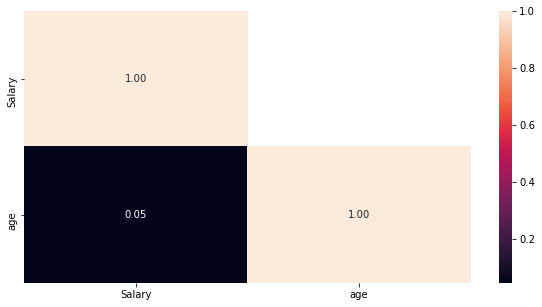

In [59]:
bivariate_analysis.plot_corr_coef_heatMap(df_holiday_package[continuos_columns])


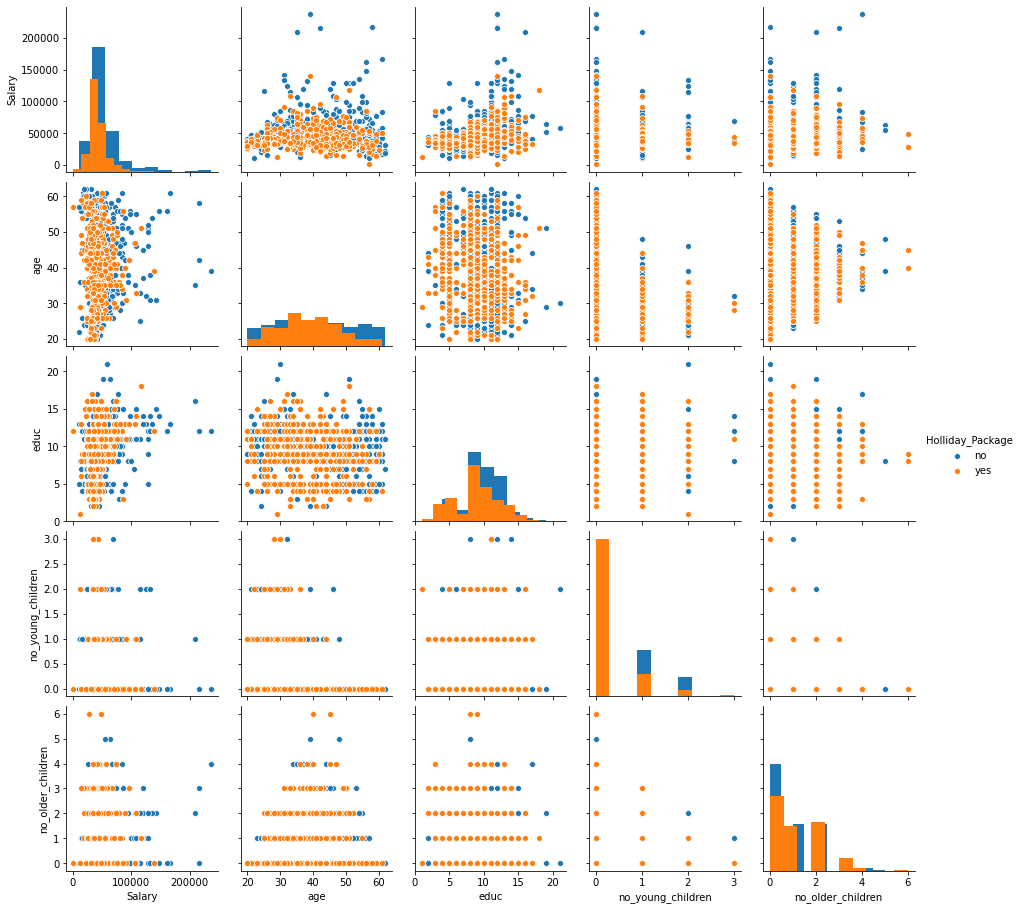

In [27]:
bivariate_analysis.plot_corr_coef_pairPlot(df_holiday_package,target_variable)



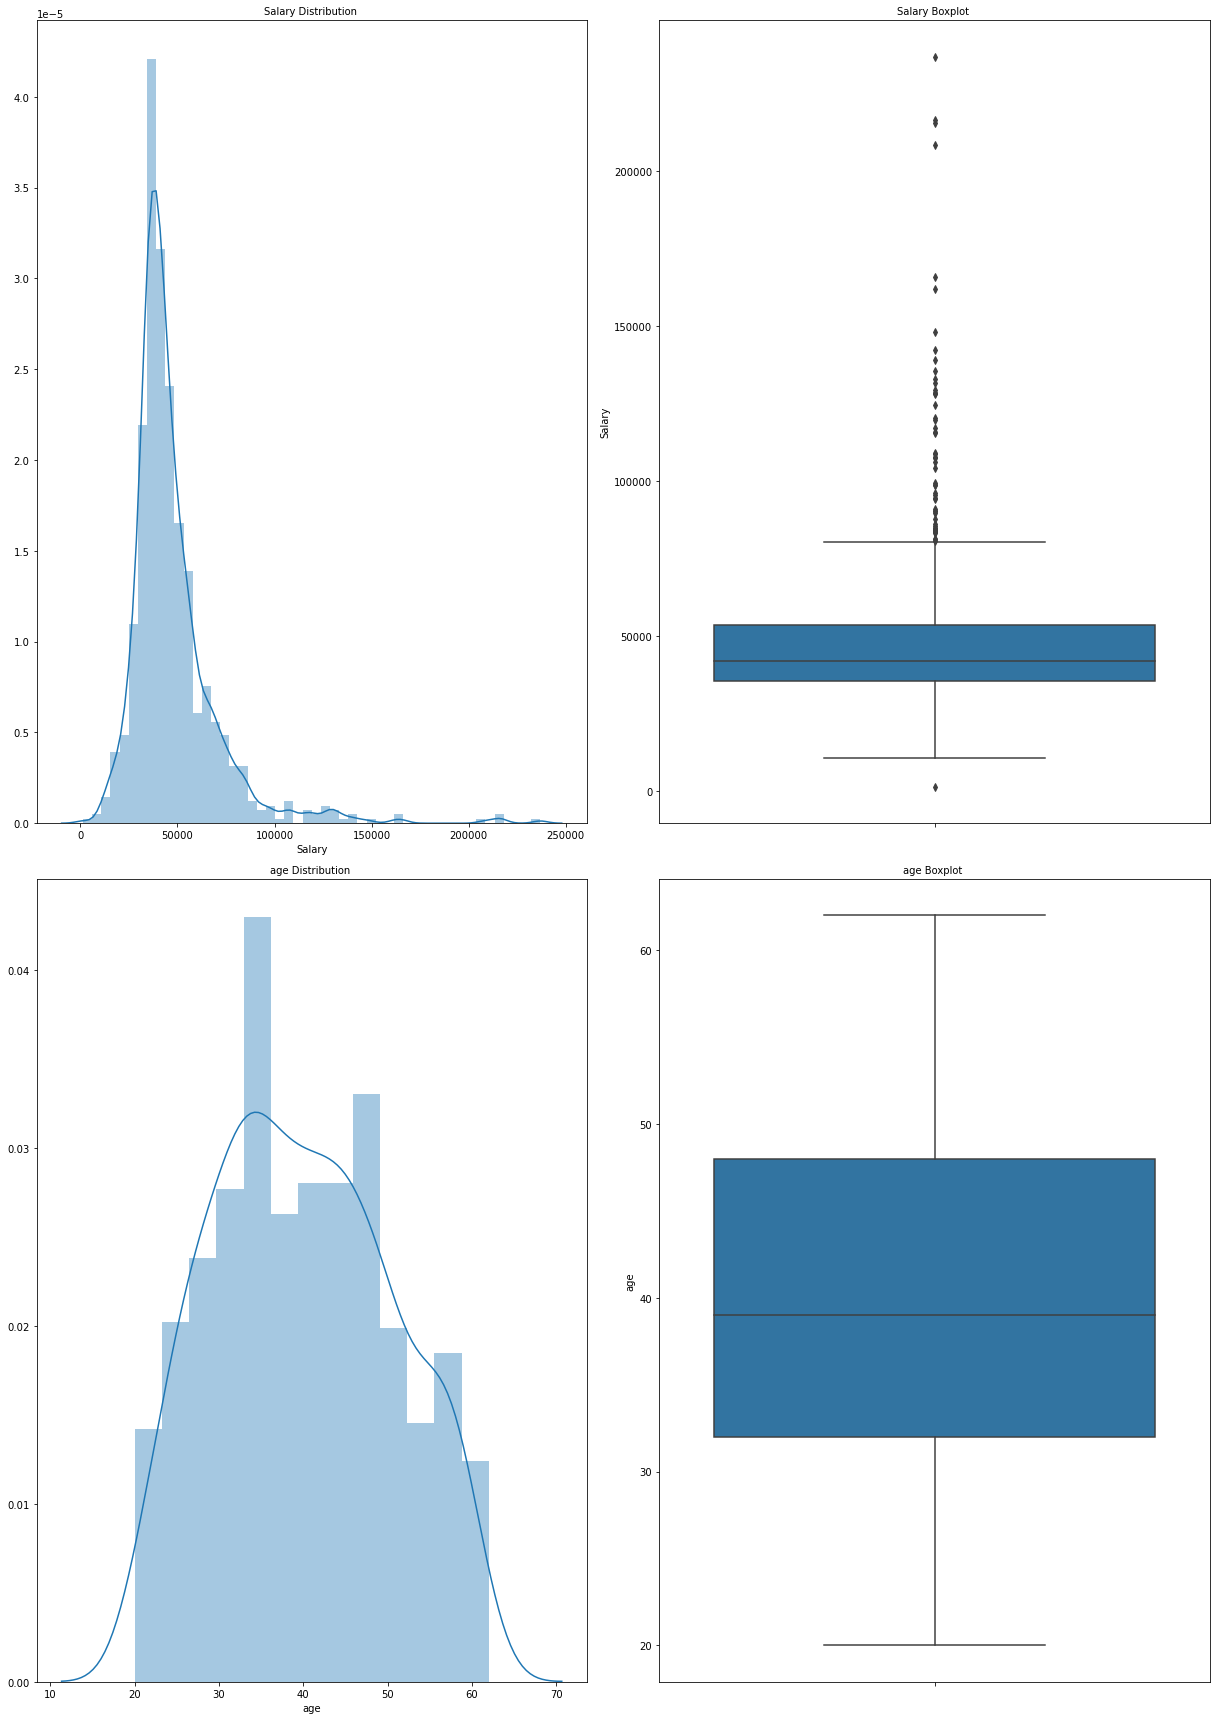

In [28]:
eda.univariate_analysis(df_holiday_package,continuos_columns)

In [29]:

eda.remove_outliers(df_holiday_package,continuos_columns)


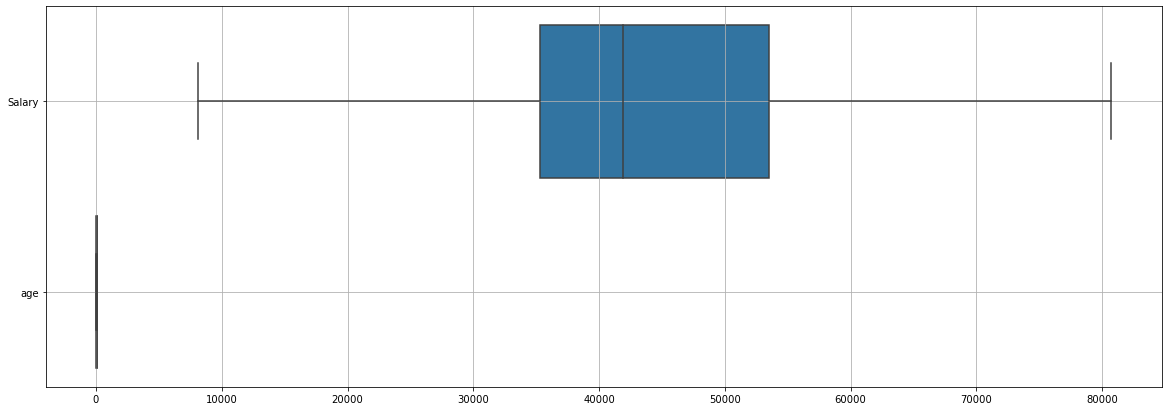

In [30]:
eda.create_boxplot(df_holiday_package[continuos_columns])

In [31]:
eda.convert_cat_into_code(df_holiday_package,categorical_columns)

Columns changed into code Holliday_Package
Columns changed into code foreign


Holliday_Package   Salary   age  educ  no_young_children  \
0                   0  48412.0  30.0     8                  1   
1                   1  37207.0  45.0     8                  0   
2                   0  58022.0  46.0     9                  0   
3                   0  66503.0  31.0    11                  2   
4                   0  66734.0  44.0    12                  0   
..                ...      ...   ...   ...                ...   
867                 0  40030.0  24.0     4                  2   
868                 1  32137.0  48.0     8                  0   
869                 0  25178.0  24.0     6                  2   
870                 1  55958.0  41.0    10                  0   
871                 0  74659.0  51.0    10                  0   

     no_older_children  foreign  
0                    1        0  
1                    1        0  
2                    0        0  
3                    0        0  
4                    2        0  
..                 ...      ...  
867                  1        1  
868                  0        1  
869                  0        1  
870                  1        1  
871                  0        1  

[872 rows x 7 columns]

In [32]:
eda.info(df_holiday_package)

'Dataset Information'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    int8   
 4   no_young_children  872 non-null    int8   
 5   no_older_children  872 non-null    int8   
 6   foreign            872 non-null    int8   
dtypes: float64(2), int8(5)
memory usage: 18.0 KB


None

In [33]:

X,Y=modals.extract_target_column(df_holiday_package,target_variable)

In [34]:
print("X",X)


X       Salary   age  educ  no_young_children  no_older_children  foreign
0    48412.0  30.0     8                  1                  1        0
1    37207.0  45.0     8                  0                  1        0
2    58022.0  46.0     9                  0                  0        0
3    66503.0  31.0    11                  2                  0        0
4    66734.0  44.0    12                  0                  2        0
..       ...   ...   ...                ...                ...      ...
867  40030.0  24.0     4                  2                  1        1
868  32137.0  48.0     8                  0                  0        1
869  25178.0  24.0     6                  2                  0        1
870  55958.0  41.0    10                  0                  1        1
871  74659.0  51.0    10                  0                  0        1

[872 rows x 6 columns]


In [35]:
print ("Y",Y)


Y 0      0
1      1
2      0
3      0
4      0
      ..
867    0
868    1
869    0
870    1
871    0
Name: Holliday_Package, Length: 872, dtype: int8


In [36]:
X_train,X_test,Y_train,Y_test = modals.split_data_into_train_test(X,Y,0.30,1)


In [37]:
print(X_train)


       Salary   age  educ  no_young_children  no_older_children  foreign
502  34017.00  57.0     5                  0                  0        0
729  32197.00  22.0     6                  1                  0        1
604  80687.75  31.0    12                  2                  0        0
246  72394.00  50.0    14                  0                  1        0
494  28596.00  49.0    15                  0                  0        0
..        ...   ...   ...                ...                ...      ...
715  40124.00  54.0     5                  0                  0        1
767  36976.00  26.0     5                  0                  1        1
72   39663.00  55.0     8                  0                  0        0
235  80687.75  55.0    14                  0                  0        0
37   80687.75  50.0     8                  0                  1        0

[610 rows x 6 columns]


In [38]:
modals.check_imbalance(Y_train)


0    0.534426
1    0.465574
Name: Holliday_Package, dtype: float64


In [39]:
modals.check_imbalance(Y_test)


0    0.553435
1    0.446565
Name: Holliday_Package, dtype: float64


In [40]:
modals.check_dimension_train_test(X_train,X_test,Y_train,Y_test)

X_train (610, 6)
X_test (262, 6)
Y_train (610,)
Y_test (262,)


In [41]:
matrix=modals.create_comparision_matrix()


'Modal Evaluation Started........'

'Model:'

'Decision_tree'

Best Param :  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50, 'min_samples_split': 150}


0
0  0
1  1
2  0
3  0
4  0

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.732824  0.267176
1  0.299320  0.700680
2  0.793478  0.206522
3  0.732824  0.267176
4  0.732824  0.267176

0         1
0  0.793478  0.206522
1  0.299320  0.700680
2  0.793478  0.206522
3  0.793478  0.206522
4  0.436782  0.563218

Area Under Curve : 0.730


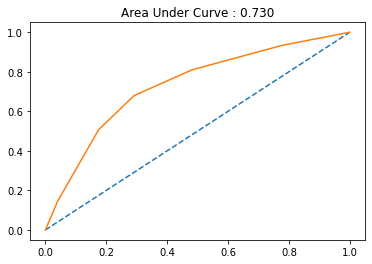

0.73
Area Under Curve : 0.700


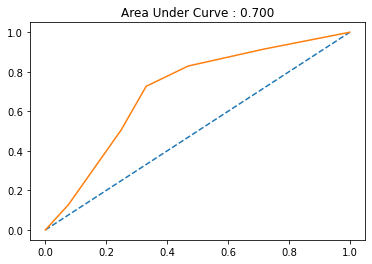

Accuracy : 0.70
0.7
Accuracy : 0.69
0.69
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       326
           1       0.67      0.68      0.67       284

    accuracy                           0.70       610
   macro avg       0.69      0.69      0.69       610
weighted avg       0.70      0.70      0.70       610

precision  0.67
recall  0.68
f1 score  0.67


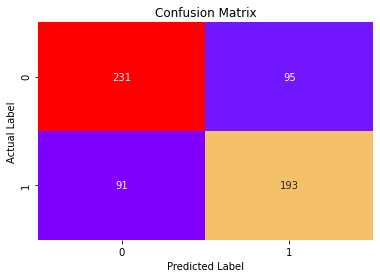

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       145
           1       0.64      0.73      0.68       117

    accuracy                           0.69       262
   macro avg       0.70      0.70      0.69       262
weighted avg       0.70      0.69      0.70       262

precision  0.64
recall  0.73
f1 score  0.68


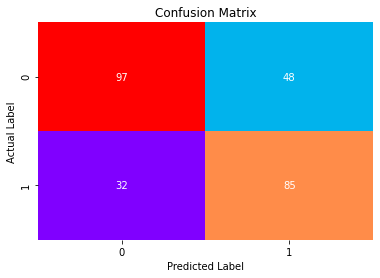

           DT_Train  DT_Test
Accuracy       0.70     0.69
AUC            0.73     0.70
Recall         0.68     0.73
Precision      0.67     0.64
F1 Score       0.67     0.68


'Modal Evaluation Started........'

'Model:'

'Random_Forest'

Best Param :  {'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 50, 'n_estimators': 200}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.731222  0.268778
1  0.435978  0.564022
2  0.872017  0.127983
3  0.562455  0.437545
4  0.372997  0.627003

0         1
0  0.590105  0.409895
1  0.249112  0.750888
2  0.896271  0.103729
3  0.592318  0.407682
4  0.407289  0.592711

Area Under Curve : 0.830


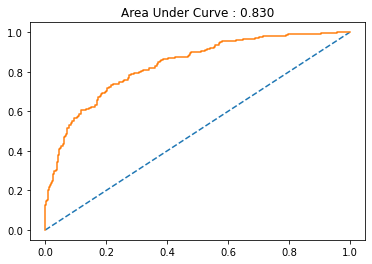

0.83
Area Under Curve : 0.710


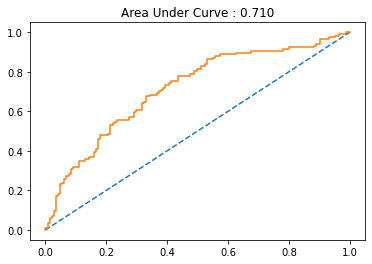

Accuracy : 0.75
0.75
Accuracy : 0.66
0.66
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       326
           1       0.76      0.68      0.72       284

    accuracy                           0.75       610
   macro avg       0.76      0.75      0.75       610
weighted avg       0.75      0.75      0.75       610

precision  0.76
recall  0.68
f1 score  0.72


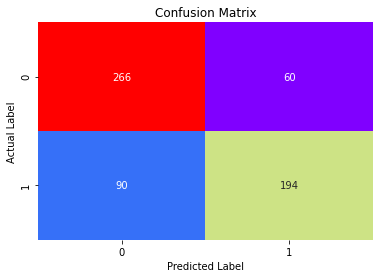

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       145
           1       0.61      0.62      0.62       117

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262

precision  0.61
recall  0.62
f1 score  0.62


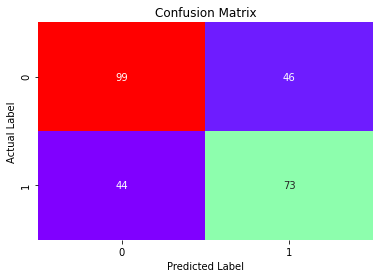

           DT_Train  DT_Test  RF_Train  RF_Test
Accuracy       0.70     0.69      0.75     0.66
AUC            0.73     0.70      0.83     0.71
Recall         0.68     0.73      0.68     0.62
Precision      0.67     0.64      0.76     0.61
F1 Score       0.67     0.68      0.72     0.62


'Modal Evaluation Started........'

'Model:'

'Neural_Network'

Best Param :  {'hidden_layer_sizes': 500, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  0
4  0

0         1
0  0.738538  0.261462
1  0.330781  0.669219
2  0.931142  0.068858
3  0.602898  0.397102
4  0.406084  0.593916

0         1
0  0.740089  0.259911
1  0.225617  0.774383
2  0.915651  0.084349
3  0.917920  0.082080
4  0.574087  0.425913

Area Under Curve : 0.760


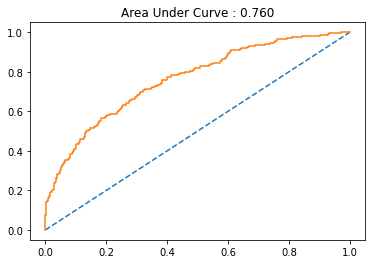

0.76
Area Under Curve : 0.700


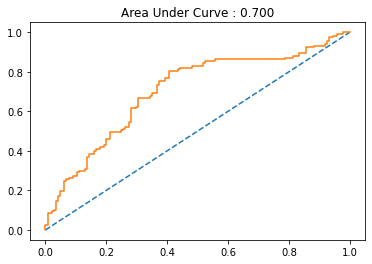

Accuracy : 0.70
0.7
Accuracy : 0.64
0.64
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       326
           1       0.73      0.57      0.64       284

    accuracy                           0.70       610
   macro avg       0.71      0.69      0.69       610
weighted avg       0.70      0.70      0.69       610

precision  0.73
recall  0.57
f1 score  0.64


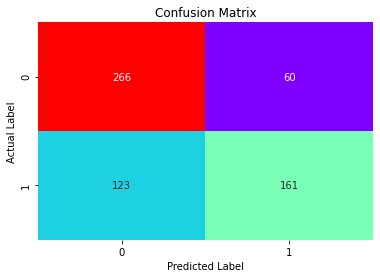

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       145
           1       0.61      0.52      0.56       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.63      0.64      0.63       262

precision  0.61
recall  0.52
f1 score  0.56


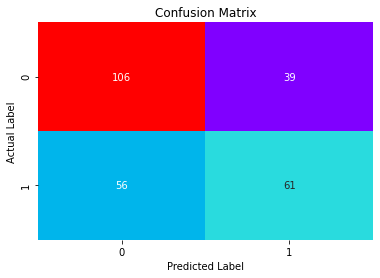

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64
AUC            0.73     0.70      0.83     0.71       0.76      0.70
Recall         0.68     0.73      0.68     0.62       0.57      0.52
Precision      0.67     0.64      0.76     0.61       0.73      0.61
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56


'Modal Evaluation Started........'

'Model:'

'Logistic_Regression'

Best Param :  {'max_iter': 100, 'penalty': 'l2', 'random_state': 100, 'solver': 'newton-cg', 'tol': 0.001}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.731299  0.268701
1  0.269331  0.730669
2  0.950613  0.049387
3  0.690274  0.309726
4  0.448412  0.551588

0         1
0  0.767056  0.232944
1  0.286662  0.713338
2  0.888828  0.111172
3  0.952326  0.047674
4  0.498775  0.501225

Area Under Curve : 0.740


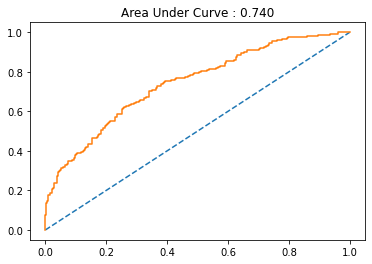

0.74
Area Under Curve : 0.700


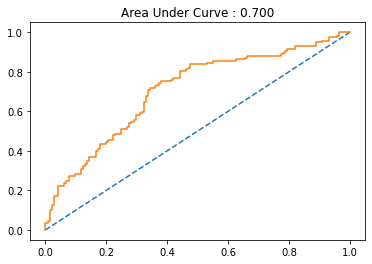

Accuracy : 0.67
0.67
Accuracy : 0.65
0.65
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.67       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.67      0.67      0.67       610

precision  0.68
recall  0.56
f1 score  0.62


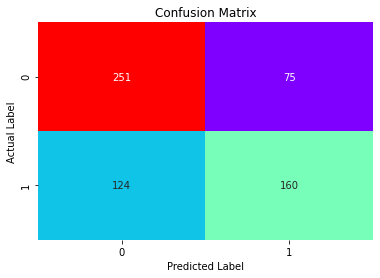

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262

precision  0.61
recall  0.57
f1 score  0.59


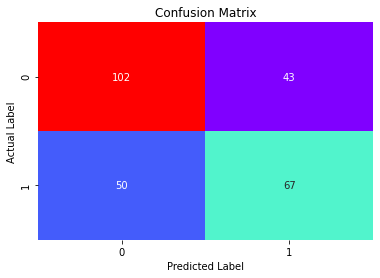

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  
Accuracy       0.67     0.65  
AUC            0.74     0.70  
Recall         0.56     0.57  
Precision      0.68     0.61  
F1 Score       0.62     0.59  


'Modal Evaluation Started........'

'Model:'

'LDA'

{'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': ['auto', None]}
Best Param :  {'shrinkage': 'auto', 'solver': 'lsqr'}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.730478  0.269522
1  0.261164  0.738836
2  0.940568  0.059432
3  0.700216  0.299784
4  0.477792  0.522208

0         1
0  0.769936  0.230064
1  0.276291  0.723709
2  0.870579  0.129421
3  0.940193  0.059807
4  0.462512  0.537488

Area Under Curve : 0.740


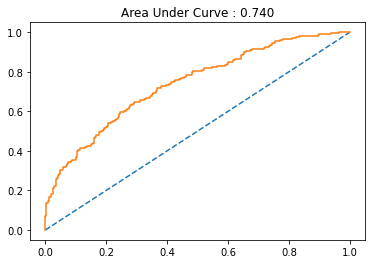

0.74
Area Under Curve : 0.700


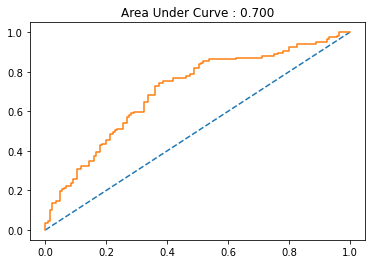

Accuracy : 0.67
0.67
Accuracy : 0.66
0.66
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       326
           1       0.69      0.55      0.61       284

    accuracy                           0.67       610
   macro avg       0.68      0.67      0.66       610
weighted avg       0.68      0.67      0.67       610

precision  0.69
recall  0.55
f1 score  0.61


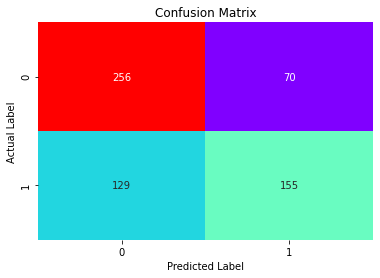

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       145
           1       0.63      0.57      0.60       117

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.65      0.66      0.65       262

precision  0.63
recall  0.57
f1 score  0.6


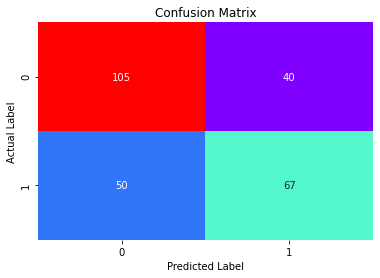

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  
Accuracy       0.67     0.65       0.67      0.66  
AUC            0.74     0.70       0.74      0.70  
Recall         0.56     0.57       0.55      0.57  
Precision      0.68     0.61       0.69      0.63  
F1 Score       0.62     0.59       0.61      0.60  


'Modal Evaluation Started........'

'Model:'

'KNN'

Best Param :  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  0
4  0

0         1
0  0.684211  0.315789
1  0.368421  0.631579
2  0.842105  0.157895
3  0.736842  0.263158
4  0.473684  0.526316

0         1
0  0.684211  0.315789
1  0.315789  0.684211
2  0.947368  0.052632
3  0.684211  0.315789
4  0.578947  0.421053

Area Under Curve : 0.780


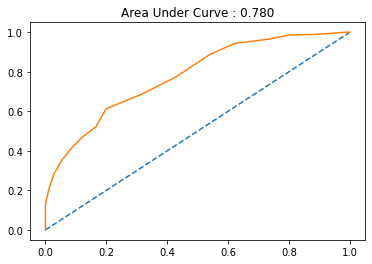

0.78
Area Under Curve : 0.690


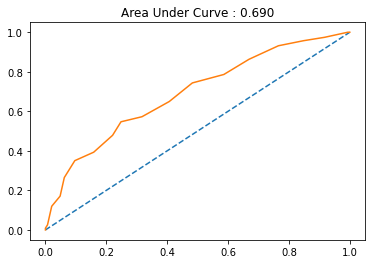

Accuracy : 0.71
0.71
Accuracy : 0.63
0.63
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       326
           1       0.73      0.61      0.67       284

    accuracy                           0.71       610
   macro avg       0.72      0.71      0.71       610
weighted avg       0.71      0.71      0.71       610

precision  0.73
recall  0.61
f1 score  0.67


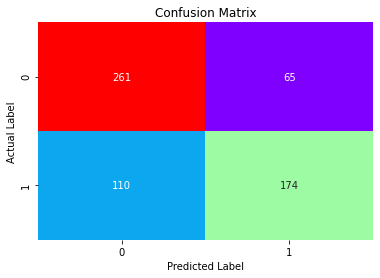

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       145
           1       0.59      0.57      0.58       117

    accuracy                           0.63       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.63      0.63      0.63       262

precision  0.59
recall  0.57
f1 score  0.58


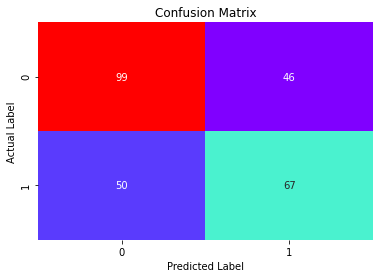

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  KNN_Train  KNN_Test  
Accuracy       0.67     0.65       0.67      0.66       0.71      0.63  
AUC            0.74     0.70       0.74      0.70       0.78      0.69  
Recall         0.56     0.57       0.55      0.57       0.61      0.57  
Precision      0.68     0.61       0.69      0.63       0.73      0.59  
F1 Score       0.62     0.59       0.61      0.60       0.67      0.58  


'Modal Evaluation Started........'

'Model:'

'Naive_Bayes'

Best Param :  {'priors': None, 'var_smoothing': 1e-09}


0
0  0
1  1
2  0
3  0
4  0

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.583187  0.416813
1  0.409232  0.590768
2  0.966871  0.033129
3  0.775407  0.224593
4  0.502545  0.497455

0         1
0  0.845482  0.154518
1  0.231687  0.768313
2  0.863584  0.136416
3  0.961033  0.038967
4  0.229502  0.770498

Area Under Curve : 0.710


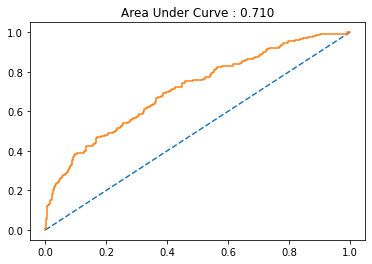

0.71
Area Under Curve : 0.740


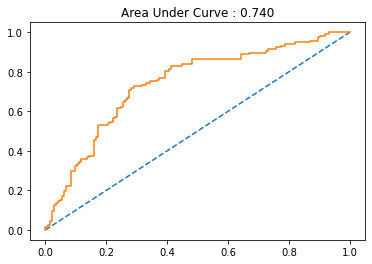

Accuracy : 0.64
0.64
Accuracy : 0.71
0.71
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       326
           1       0.62      0.59      0.60       284

    accuracy                           0.64       610
   macro avg       0.64      0.63      0.63       610
weighted avg       0.64      0.64      0.64       610

precision  0.62
recall  0.59
f1 score  0.6


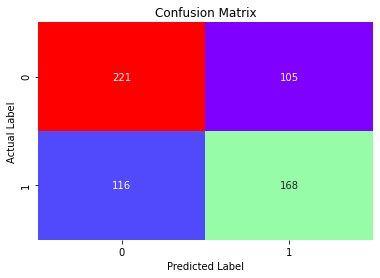

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       145
           1       0.67      0.70      0.69       117

    accuracy                           0.71       262
   macro avg       0.71      0.71      0.71       262
weighted avg       0.72      0.71      0.71       262

precision  0.67
recall  0.7
f1 score  0.69


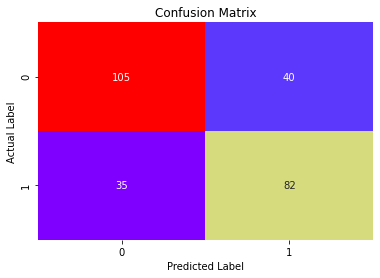

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  KNN_Train  KNN_Test  \
Accuracy       0.67     0.65       0.67      0.66       0.71      0.63   
AUC            0.74     0.70       0.74      0.70       0.78      0.69   
Recall         0.56     0.57       0.55      0.57       0.61      0.57   
Precision      0.68     0.61       0.69      0.63       0.73      0.59   
F1 Score       0.62     0.59       0.61      0.60       0.67      0.58   

           NB_Train  NB_Test  
Accuracy       0.64     0.71  
AUC            0.71     0.74  
Recall         0.59     0.70 

'Modal Evaluation Started........'

'Model:'

'Bagging'

{'n_estimators': [1, 20, 30, 40, 50], 'max_samples': [0.4, 0.6, 0.8, 1.0], 'max_features': [0.3, 0.4, 0.5, 0.6, 1], 'random_state': [100, None], 'base_estimator': [SVC(), DecisionTreeClassifier(), LogisticRegression()]}
Best Param :  {'base_estimator': SVC(), 'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 1, 'random_state': 100}


0
0  0
1  0
2  0
3  0
4  0

0
0  0
1  1
2  0
3  0
4  1

0    1
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

0    1
0  1.0  0.0
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  0.0  1.0

Area Under Curve : 0.580


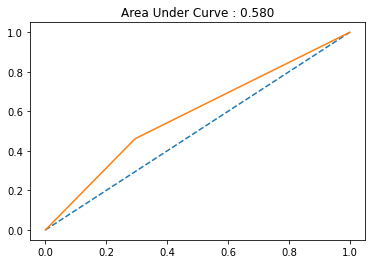

0.58
Area Under Curve : 0.640


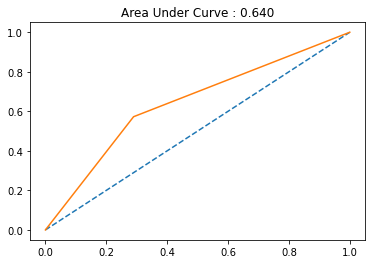

Accuracy : 0.59
0.59
Accuracy : 0.65
0.65
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       326
           1       0.58      0.46      0.51       284

    accuracy                           0.59       610
   macro avg       0.59      0.58      0.58       610
weighted avg       0.59      0.59      0.59       610

precision  0.58
recall  0.46
f1 score  0.51


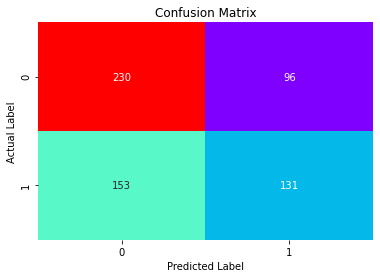

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262

precision  0.61
recall  0.57
f1 score  0.59


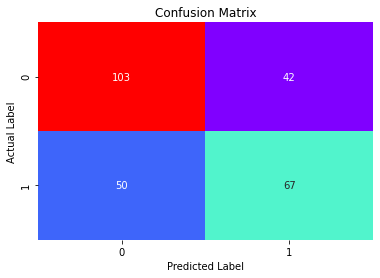

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  KNN_Train  KNN_Test  \
Accuracy       0.67     0.65       0.67      0.66       0.71      0.63   
AUC            0.74     0.70       0.74      0.70       0.78      0.69   
Recall         0.56     0.57       0.55      0.57       0.61      0.57   
Precision      0.68     0.61       0.69      0.63       0.73      0.59   
F1 Score       0.62     0.59       0.61      0.60       0.67      0.58   

           NB_Train  NB_Test  BGG_Train  BGG_Test  
Accuracy       0.64     0.71       0.59      0.65  
AUC            0.7

'Modal Evaluation Started........'

'Model:'

'Ada_boost'

Best Param :  {'learning_rate': 0.2, 'n_estimators': 50, 'random_state': None}


0
0  0
1  1
2  0
3  1
4  1

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.518187  0.481813
1  0.491456  0.508544
2  0.558826  0.441174
3  0.495138  0.504862
4  0.476530  0.523470

0         1
0  0.513688  0.486312
1  0.472158  0.527842
2  0.539255  0.460745
3  0.537075  0.462925
4  0.486749  0.513251

Area Under Curve : 0.780


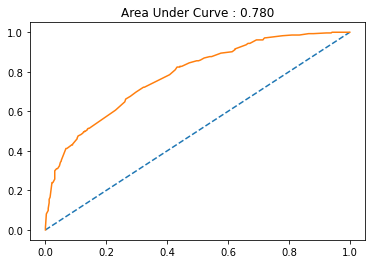

0.78
Area Under Curve : 0.730


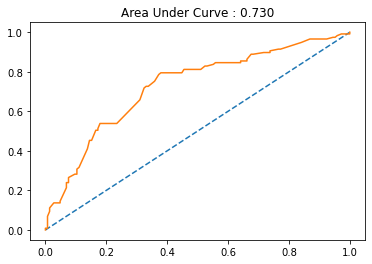

Accuracy : 0.69
0.69
Accuracy : 0.68
0.68
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       326
           1       0.70      0.61      0.65       284

    accuracy                           0.69       610
   macro avg       0.69      0.69      0.69       610
weighted avg       0.69      0.69      0.69       610

precision  0.7
recall  0.61
f1 score  0.65


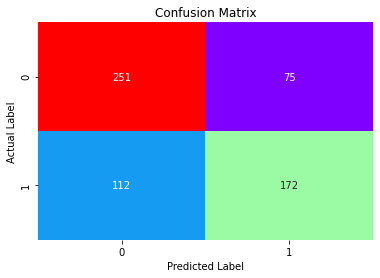

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       145
           1       0.63      0.66      0.64       117

    accuracy                           0.68       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.68      0.68      0.68       262

precision  0.63
recall  0.66
f1 score  0.64


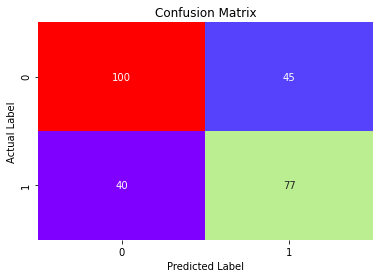

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  KNN_Train  KNN_Test  \
Accuracy       0.67     0.65       0.67      0.66       0.71      0.63   
AUC            0.74     0.70       0.74      0.70       0.78      0.69   
Recall         0.56     0.57       0.55      0.57       0.61      0.57   
Precision      0.68     0.61       0.69      0.63       0.73      0.59   
F1 Score       0.62     0.59       0.61      0.60       0.67      0.58   

           NB_Train  NB_Test  BGG_Train  BGG_Test  AB_Train  AB_Test  
Accuracy       0.64     0.71       0.59      0.65  

'Modal Evaluation Started........'

'Model:'

'Gradient_Boosting'

Best Param :  {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_split': 7, 'n_estimators': 50, 'random_state': None}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  1
4  1

0         1
0  0.884515  0.115485
1  0.047323  0.952677
2  0.898592  0.101408
3  0.835072  0.164928
4  0.063396  0.936604

0         1
0  0.904194  0.095806
1  0.492629  0.507371
2  0.974122  0.025878
3  0.179165  0.820835
4  0.260592  0.739408

Area Under Curve : 1.000


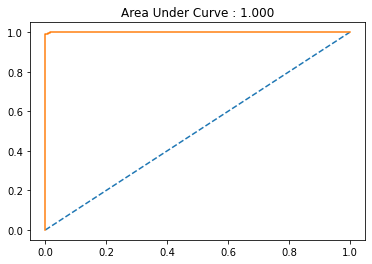

1.0
Area Under Curve : 0.680


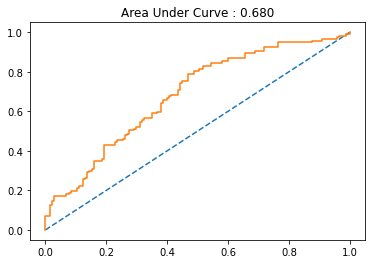

Accuracy : 1.00
1.0
Accuracy : 0.61
0.61
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       326
           1       1.00      0.99      0.99       284

    accuracy                           1.00       610
   macro avg       1.00      0.99      1.00       610
weighted avg       1.00      1.00      1.00       610

precision  1.0
recall  0.99
f1 score  0.99


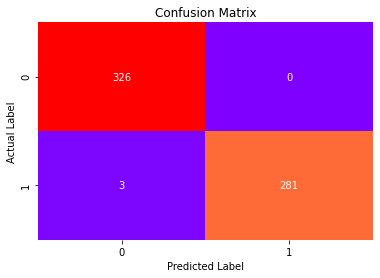

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       145
           1       0.56      0.60      0.58       117

    accuracy                           0.61       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.61      0.61      0.61       262

precision  0.56
recall  0.6
f1 score  0.58


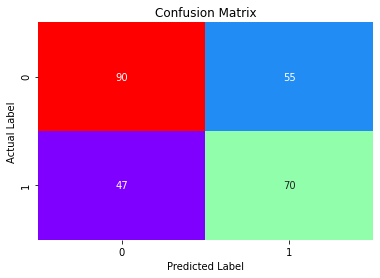

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  KNN_Train  KNN_Test  \
Accuracy       0.67     0.65       0.67      0.66       0.71      0.63   
AUC            0.74     0.70       0.74      0.70       0.78      0.69   
Recall         0.56     0.57       0.55      0.57       0.61      0.57   
Precision      0.68     0.61       0.69      0.63       0.73      0.59   
F1 Score       0.62     0.59       0.61      0.60       0.67      0.58   

           NB_Train  NB_Test  BGG_Train  BGG_Test  AB_Train  AB_Test  \
Accuracy       0.64     0.71       0.59      0.65 

'Modal Evaluation Started........'

'Model:'

'Support_Vector_Machine'

Best Param :  {'C': 3.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 100}


0
0  0
1  1
2  0
3  0
4  1

0
0  0
1  1
2  0
3  0
4  1

0         1
0  0.711177  0.288823
1  0.350027  0.649973
2  0.754782  0.245218
3  0.578850  0.421150
4  0.284067  0.715933

0         1
0  0.685927  0.314073
1  0.304314  0.695686
2  0.748669  0.251331
3  0.745193  0.254807
4  0.353350  0.646650

Area Under Curve : 0.820


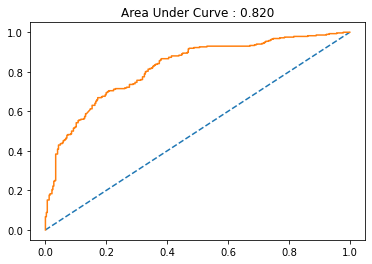

0.82
Area Under Curve : 0.700


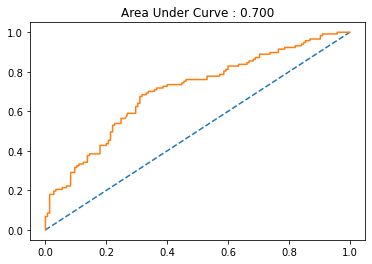

Accuracy : 0.74
0.74
Accuracy : 0.66
0.66
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       326
           1       0.80      0.59      0.68       284

    accuracy                           0.74       610
   macro avg       0.75      0.73      0.73       610
weighted avg       0.75      0.74      0.73       610

precision  0.8
recall  0.59
f1 score  0.68


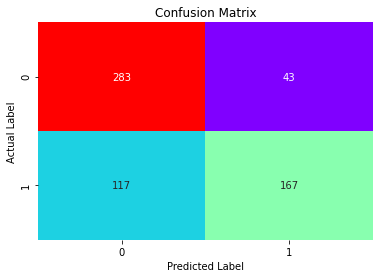

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       145
           1       0.63      0.56      0.60       117

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262

precision  0.63
recall  0.56
f1 score  0.6


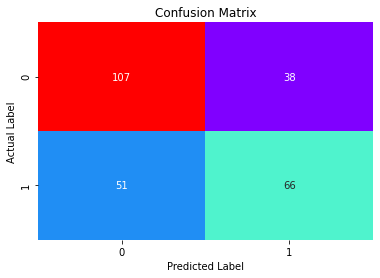

           DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  ...  NB_Train  NB_Test  \
Accuracy       0.67     0.65       0.67      0.66  ...      0.64     0.71   
AUC            0.74     0.70       0.74      0.70  ...      0.71     0.74   
Recall         0.56     0.57       0.55      0.57  ...      0.59     0.70   
Precision      0.68     0.61       0.69      0.63  ...      0.62     0.67   
F1 Score       0.62     0.59       0.61      0.60  ...      0.60     0.69   

           BGG_Train  BGG_Test  AB_Train  AB_Test  GB_Train  GB_Test  \
Accuracy        0.59      0.65  

In [42]:
for i in modals_data.index:
    if(modals_data.iloc[i][0]=="ON"):
        X_train,X_test,Y_train,Y_test = modals.split_data_into_train_test(X,Y,0.30,1)
        best_grid,X_train,X_test=modals.build_modal(modals_data.iloc[i],X_train,Y_train,X_test)
        Y_train_predict,Y_test_predict=modals.get_predicted_target_variable(best_grid,X_train,X_test)
        Y_train_predict_prob,Y_test_predict_prob=modals.get_predicted_target_variable_prob(best_grid,X_train,X_test)
        train_auc=modals.get_auc_roc(best_grid,X_train,Y_train)
        print(train_auc)
        test_auc=modals.get_auc_roc(best_grid,X_test,Y_test)
        train_accuracy=modals.get_accuracy(best_grid,X_train,Y_train)
        print(train_accuracy)
        test_accuracy=modals.get_accuracy(best_grid,X_test,Y_test)
        print(test_accuracy)
        train_precsion,train_recall,train_f1=modals.get_classification_report(Y_train,Y_train_predict)
        modals.get_confusion_matrix(Y_train,Y_train_predict)
        test_precsion,test_recall,test_f1=modals.get_classification_report(Y_test,Y_test_predict)
        modals.get_confusion_matrix(Y_test,Y_test_predict)
        matrix[modals_data.iloc[i][5]+'_Train']=[train_accuracy,train_auc,train_recall,train_precsion,train_f1]
        matrix[modals_data.iloc[i][5]+'_Test']=[test_accuracy,test_auc,test_recall,test_precsion,test_f1]
        print(matrix)


In [43]:
display(pd.DataFrame(matrix))

DT_Train  DT_Test  RF_Train  RF_Test  ANN_Train  ANN_Test  \
Accuracy       0.70     0.69      0.75     0.66       0.70      0.64   
AUC            0.73     0.70      0.83     0.71       0.76      0.70   
Recall         0.68     0.73      0.68     0.62       0.57      0.52   
Precision      0.67     0.64      0.76     0.61       0.73      0.61   
F1 Score       0.67     0.68      0.72     0.62       0.64      0.56   

           LR_Train  LR_Test  LDA_Train  LDA_Test  ...  NB_Train  NB_Test  \
Accuracy       0.67     0.65       0.67      0.66  ...      0.64     0.71   
AUC            0.74     0.70       0.74      0.70  ...      0.71     0.74   
Recall         0.56     0.57       0.55      0.57  ...      0.59     0.70   
Precision      0.68     0.61       0.69      0.63  ...      0.62     0.67   
F1 Score       0.62     0.59       0.61      0.60  ...      0.60     0.69   

           BGG_Train  BGG_Test  AB_Train  AB_Test  GB_Train  GB_Test  \
Accuracy        0.59      0.65      0.69     0.68      1.00     0.61   
AUC             0.58      0.64      0.78     0.73      1.00     0.68   
Recall          0.46      0.57      0.61     0.66      0.99     0.60   
Precision       0.58      0.61      0.70     0.63      1.00     0.56   
F1 Score        0.51      0.59      0.65     0.64      0.99     0.58   

           SVM_Train  SVM_Test  
Accuracy        0.74      0.66  
AUC             0.82      0.70  
Recall          0.59      0.56  
Precision       0.80      0.63  
F1 Score        0.68      0.60  

[5 rows x 22 columns]

In [44]:
eda.export_to_excel(matrix)